# COMP6915 - Assignment2 - Team 12

### Data Set

The data consists of a total of 8 features, among which 7 features relate to the relative amounts of the ingredients (Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate respectively) in a concrete mixture, while a single feature denotes the age of the concrete.   

Experimentally determined compressive strength for the given concrete mixture is provided as the outcome variable. The “training” and “test” datasets consisting of 800 and 100 samples respectively are given in the train.csv and test.csv files respectively.

In [ ]:
# Enable and Disabel warning as required
# Ignore Warning before Final PDF Generation to make it clean
import warnings
warnings.filterwarnings("ignore")
#warnings.resetwarnings()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Load the data from local session files
# train_data = pd.read_csv("train.csv")
# test_data = pd.read_csv("test.csv")

# Load the data from Drive files
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive', force_remount=True)

dir_path = r"/content/drive/MyDrive/Colab Notebooks/MLA2/"
p_train_data = dir_path+"train.csv"
p_test_data = dir_path+"test.csv"

train_data = pd.read_csv(p_train_data)
test_data = pd.read_csv(p_test_data)

# Extract the Data
#############################################
# Extract the Design Matrix of 8 features from the Training and Test Data
X_train = train_data.iloc[:, :-1]
X_test = test_data.iloc[:, :-1]

# Extract Output ConcreteCompressiveStrength_MPa_Megapascals_ from Training and Test Data
y_train = train_data.iloc[:, -1]
y_test = test_data.iloc[:, -1]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 1

---

* Train a multivariate ordinary least squares (“simple”) linear regression model to predict the compressive strength of an input concrete mixture based on the relevant features. 

* Estimate the “Err” using both the **validation approach** (i.e.,
train a model on the “training” dataset and test on the “test” dataset) as well as using a **cross-validation (CV) approach** (i.e. only using the “training” dataset). 

* Discuss the choice of the number folds used in your CV approach, and compare the “Err” estimates obtained using the validation and CV approaches.

**Performance reporting convention:**
Always report both the residual standard error (RSE) and the R2 statistic performance metrics when summarizing the performance (“Err”) of a regression model.

### Discussion: 

The **validation approach** involves splitting the data into a training dataset and a testing dataset. The training dataset is used to train the model, while the testing dataset is used to evaluate the performance of the model. By comparing the predicted values from the model with the actual values in the testing dataset, we can estimate the "Err" of the model. This approach is useful in detecting overfitting or underfitting, as it allows us to evaluate the model's performance on data that it has not seen during training.

The **cross-validation approach** involves dividing the training dataset into multiple subsets, or "folds," and training the model on each fold while testing on the remaining folds. By repeating this process for each fold, we can estimate the average performance of the model. This approach is useful when the dataset is small, as it allows us to make the most of the available data for training and testing the model.

By using both approaches to estimate the "Err" of a multivariate ordinary least squares linear regression model, we can obtain a more accurate and reliable estimate of the model's performance. This can help us make more informed decisions about the model and improve its accuracy and generalizability to new data

The **KFold** function is imported from the scikit-learn library and is used to Split the data set according to the in the specified criteria.


In [5]:
# Train linear regression model
#############################################
# Create a linear regression object
lr = LinearRegression()
# Fit the model using the training data
lr.fit(X_train, y_train)

# Validation Approach
#############################################
# Make predictions on the test data
y_pred = lr.predict(X_test)

# Compute the performance using validation approach
rse_val = np.sqrt(mean_squared_error(y_test, y_pred))
r2_val = r2_score(y_test, y_pred)

# Print the results
print("Validation approach:")
print("RSE: {:.4f}".format(rse_val))
print("R2: {:.4f}".format(r2_val))

# Cross-Validation approach Approach
#############################################

# Create the K-Fold
# n_splits: number of folds to be used for cross-validation.
# shuffle: shuffle the data before splitting it into folds.
# random_state: To seed the random number generator  for shuffling. 
# Setting the same value for random_state parameter ensures  the same shuffling.
kf = KFold(n_splits=5, shuffle=True, random_state=50) # Define the number of folds

rse_cv = np.sqrt(-cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean())
r2_cv = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2').mean()

# Print the results
print("\nCross-validation approach:")
print("Residual Standard Error [RSE]: {:.4f}".format(rse_cv))
print("R2 statistic: {:.4f}".format(r2_cv))


Validation approach:
RSE: 9.5416
R2: 0.5953

Cross-validation approach:
RSE: 10.3412
R2: 0.6202


# Question 2

---

* Train a multivariate Ridge regression model for the above concrete compressive strength prediction task. Use the “training” dataset and a CV based grid-search approach to tune the regularization parameter “α” of the Ridge
regression model. 

* Using the “best” “α” setting, re-train on the entire “training” dataset to obtain the final Ridge regression model.

* Estimate the “Err” of this final model on the “test” dataset. Plot the performance of the models explored during the “α” hyperparameter tuning phase as function of “α”.

* Compare the performance of the Ridge regression model with that of the “simple” linear regression model.


### Discussion: 

**GridSearchCV** is the function used  from the sklearn.model_selection module that performs an exhaustive search over specified parameter values for an estimator, in order to find the best set of hyperparameters that maximize a scoring metric. GridSearchCV function takes several parameters:
* ***estimator***: This is the estimator object that is to be tuned. In this case, it is Ridge().
* ***param_grid***: This parameter is a dictionary of hyperparameters to be tuned. In this case, it is a dictionary with the regularization parameter alpha as the key and a list of values to be tried for alpha as the value.
* ***scoring***: This parameter specifies the scoring metric to be used to evaluate the performance of the model. In this case, it is set to 'neg_mean_squared_error'.
* ***cv***: This parameter specifies the cross-validation splitting strategy. In this case, it is set to kf which is a KFold object that has been initialized earlier.
* ***refit***: This parameter specifies whether to refit the estimator using the best found parameters on the whole dataset or not. In this case, it is set to True to refit the estimator.

**neg_mean_squared_error** was used as the scoring parameter for GridSearchCV because we are dealing with a regression problem and the goal is to minimize the mean squared error. By taking the negative of the mean squared error, GridSearchCV treats it as a maximization problem, which is consistent with the goal of maximizing the performance metric.

**Ridge** is the linear regression model with L2 regularization. It is used to avoid overfitting in linear regression models by adding a penalty term to the cost function that reduces the magnitude of the coefficients. The Ridge function has a single parameter:

* ***alpha***: This parameter specifies the regularization strength. Higher values of alpha result in more regularization and smaller coefficients, which may help to prevent overfitting.


Best alpha value: 7742.63683
Best Score:  10.323793602538235
Residual Standard Error [RSE]: 9.5428
R2 statistic: 0.5952


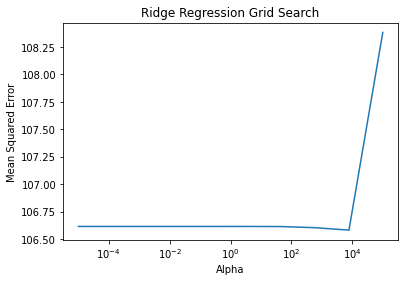

In [26]:
# CV based grid-search to tune parameter “α” of the Ridge regression model
# ##############################################################################
# Define the Ridge model
ridge = Ridge()

# Define the range of alpha values to search
# range:  between 10^-5 to 10^5 with 10 values spaced evenly on a logarithmic scale.
alpha_range = np.logspace(-5, 5, 10)

# Perform a grid search to tune the regularization parameter
param_grid = {'alpha': alpha_range}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameter and score
best_alpha = grid_search.best_params_['alpha']
print("Best alpha value: {:.5f}".format(best_alpha))
print("Best Score: ", np.sqrt(-grid_search.best_score_))

# New Ridge model Using the “best” “α” setting
# ##############################################################################
ridge = Ridge(alpha=best_alpha)

# re-train on the entire “training” dataset to obtain the final Ridge regression model.
ridge.fit(X_train, y_train)

# predict on the test set
y_pred = ridge.predict(X_test)

# Performance Evaluation
# ##############################################################################

# Compute the RSE and R2 error on the test set
rse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Residual Standard Error [RSE]: {:.4f}".format(rse))
print("R2 statistic: {:.4f}".format(r2))

# Plot the performance of the models explored during the alpha hyperparameter tuning phase as function of alpha
mse_scores = -grid_search.cv_results_['mean_test_score']
plt.semilogx(alpha_range, mse_scores)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Grid Search')
plt.show()


# Question 3

---

* Repeat the above experiment with a multivariate Lasso regression model. 
* Plot the performance of the models explored during the “α” hyperparameter tuning phase as function of “α”. 
* Compare the performance of the final Lasso regression model with that of both the Ridge regression and the “simple” linear regression models.



Best alpha parameter value:  0.09111627561154886


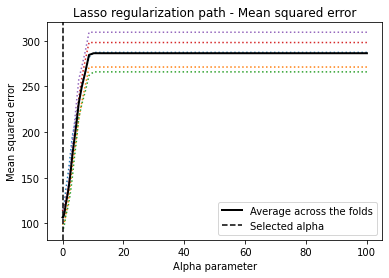

Lasso Regression - Test RSE: 9.594899104409219
Lasso Regression - Test R2 score: 0.5907755504388721

Linear Regression - Test RSE: 9.541579629003255
Linear Regression - Test R2 score: 0.5953110867026099

Ridge Regression - Test RSE: 9.550508294681698
Ridge Regression - Test R2 score: 0.5945533457909424

Lasso Regression - Test RSE: 9.594899104409219
Lasso Regression - Test R2 score: 0.5907755504388721


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Extract features and target variable
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Lasso regression model with CV-based hyperparameter tuning
alphas = np.logspace(-5, 2, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter value
print("Best alpha parameter value: ", lasso_cv.alpha_)

# Plot the performance of the Lasso models explored during hyperparameter tuning
plt.figure()
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_, ':')
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(lasso_cv.alpha_, linestyle='--', color='k', label='Selected alpha')
plt.legend()
plt.xlabel('Alpha parameter')
plt.ylabel('Mean squared error')
plt.title('Lasso regularization path - Mean squared error')
plt.show()

# Train the final Lasso regression model with the best alpha value
lasso_reg = LassoCV(alphas=lasso_cv.alphas_, cv=5)
lasso_reg.fit(X_train, y_train)

# Evaluate the performance of the Lasso model on the test data
y_pred = lasso_reg.predict(X_test)
rse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Lasso Regression - Test RSE:", rse)
print("Lasso Regression - Test R2 score:", r2)

# Compare the performance of the Lasso model with that of the Ridge and simple linear regression models
simple_reg = LinearRegression()
simple_reg.fit(X_train, y_train)
simple_y_pred = simple_reg.predict(X_test)
simple_rse = np.sqrt(mean_squared_error(y_test, simple_y_pred))
simple_r2 = r2_score(y_test, simple_y_pred)

ridge_reg = RidgeCV(alphas=alphas, cv=5)
ridge_reg.fit(X_train, y_train)
ridge_y_pred = ridge_reg.predict(X_test)
ridge_rse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("\nLinear Regression - Test RSE:", simple_rse)
print("Linear Regression - Test R2 score:", simple_r2)

print("\nRidge Regression - Test RSE:", ridge_rse)
print("Ridge Regression - Test R2 score:", ridge_r2)

print("\nLasso Regression - Test RSE:", rse)
print("Lasso Regression - Test R2 score:", r2)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def predictCompressiveStrength(Xtest, data_dir):
    # Load the training data
    train_data = pd.read_csv(data_dir + "/train.csv")

    # Extract the features and target variable from the training data
    Xtrain = train_data.iloc[:, :-1]
    ytrain = train_data.iloc[:, -1]

    # Standardize the data
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    # Train a Gradient Boosting Regressor with hyperparameter tuning
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, min_samples_split=5, random_state=42)
    model.fit(Xtrain, ytrain)

    # Make predictions on the test data
    ytest = model.predict(Xtest)

    return ytest

